In [27]:
import pandas as pd
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict

In [28]:
dataset = pd.read_csv('./dataset/SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
dataset.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [29]:
stopwords = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text
dataset.text = dataset.text.apply(clean_text)
dataset.head(10)

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
5,spam,freemsg hey darling weeks word back id like fu...
6,ham,even brother like speak treat like aids patent
7,ham,per request melle melle oru minnaminunginte nu...
8,spam,winner valued network customer selected receiv...
9,spam,mobile months u r entitled update latest colou...


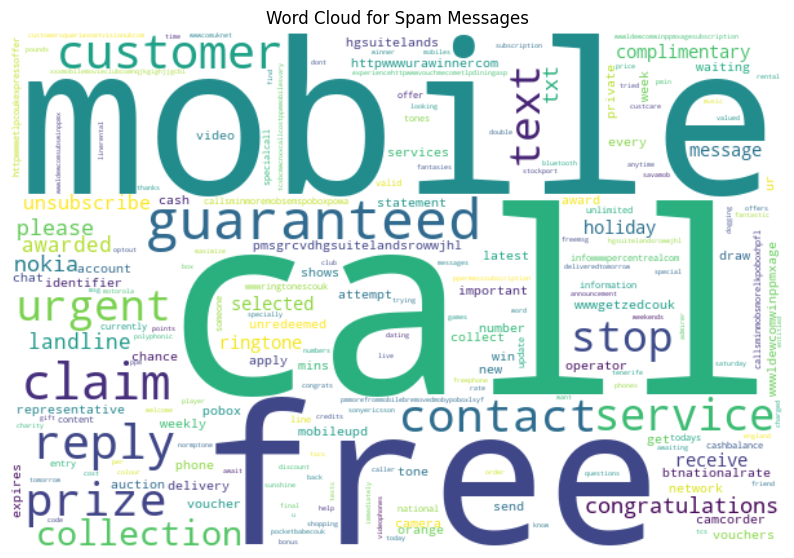

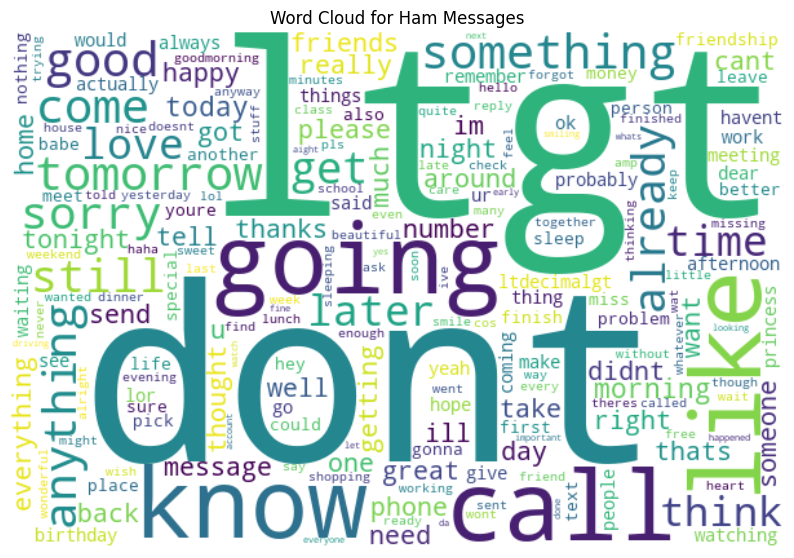

In [30]:
# Split the dataset into spam and ham messages
spam_messages = dataset[dataset['label'] == 'spam']['text'].str.cat(sep=' ')
ham_messages = dataset[dataset['label'] == 'ham']['text'].str.cat(sep=' ')

# Function to compute adjusted frequencies based on word length
def compute_adjusted_frequencies(text):
    words = text.split()
    freq = defaultdict(int)
    for word in words:
        freq[word] += len(word) ** 1.8
    return freq

# Compute adjusted frequencies
spam_freq = compute_adjusted_frequencies(spam_messages)
ham_freq = compute_adjusted_frequencies(ham_messages)

# Create word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(spam_freq)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(ham_freq)

# Plot word cloud for spam messages
plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Plot word cloud for ham messages
plt.figure(figsize=(10, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()